In [1]:
!pip install -U ncps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 894.6 kB/s eta 0:00:00


# Pilot Study for Energy Based Liquid Neural Network

This is the pilot study for Energy Based Liquid Neural Network. The aim is to create a hybrid architecture combining Liquid Neural Network with Energy Based Model. This is to create a system that is robust,adaptable in a dynamics system and capable to handle multi-objective environment.

Since the entire research objective is to utilize and understand the inherent causality of Liquid Neural Network, the domain problem must be an area that is verifiable easily with physics. Therefore, the hybrid architecture will be tested within furnace thermodynamic system.

For the purpose of pilot study, synthetic data will be used. The synthetic data is generated using thermodynamic equation of a furnace with varying conditions to observe multiple dynamic conditions that might exist in a real industrial furnace.

The objective of this pilot study is to study the feasability of the hybrid architecture. Therefore a full training regime will be implemented and evaluated with test data.


## Part 1 : Generating the Synthetic Data

The synthetic data is generated using the equations as detailed below.

### Heat Balance Model

The furnace temperature is calculated using a comprehensive heat transfer model:


$$Q_\text{net} = Q_\text{combustion} - Q_{loss} - Q_{inflow}$$
$$ΔT = Q_{net} / (m_{furnace} × c_p) × Δt$$
$$T_new = T_current + ΔT$$


### Detailed Component Equations

$$Q_{\text{combustion}} = \text{Fuel} \times \text{efficiency} \times \text{max_fuel_energy} \times \Delta t$$

Where efficiency is calculated using a Gaussian curve based on Air-Fuel Ratio (AFR):
$$AFR = \frac{\text{air_flow}}{\text{fuel_flow}}$$

$$\text{efficiency} = \exp\left(-\frac{(AFR - AFR_{\text{opt}})^2}{2\sigma^2}\right)$$

**2. Environmental Heat Loss (Q_environmental_loss)**:

$$Q_{\text{environmental\_loss}} = \text{heat\_loss\_coeff} \times (T_{\text{current}} - T_{\text{ambient}}) \times \Delta t$$


**3. Inflow Heat Transfer (Q_inflow_transfer):**

$$Q_{\text{inflow_transfer}} = \text{inlet_heat_transfer_coeff} \times \text{inflow_rate} \times (T_{\text{current}} - T_{\text{inflow}}) \times \Delta t$$


**4. Excess Oxygen Calculation:**

$$O_{2, \text{stoich}} = 20.9\% \text{ (atmospheric oxygen content)}$$$$O_{2, \text{excess}} = \begin{cases} O_{2, \text{stoich}} \times \left(1 - \frac{1}{AFR}\right) \times 100 & \text{if } AFR > 1 \\ 0 & \text{if } AFR \le 1 \text{ (incomplete combustion)} \end{cases}$$

**5. CO Emissions Model:**

$$CO \text{ (ppm)} = \begin{cases} \min(100, 6 \times \exp(1.6 \times (1.5 - O_2))) & \text{if } O_2 < 1.5\% \\ 0 & \text{if } 1.5\% \le O_2 \le 2.5\% \\ 1 + (O_2 - 2.5) & \text{if } O_2 > 2.5\% \end{cases}$$

**6. CO₂ Emissions Model:**

$$CO_2 \text{ (kg)} = \text{fuel\_flow} \times (2.0 \text{ kg/unit}) \times \Delta t$$

### Physical Constants

| Parameter | Value | Unit | Description |
|-----------|-------|------|-------------|
| $AFR_{opt}$ | 14.7 | - | Optimal air-fuel ratio (stoichiometric) |
| $E_{fuel_{max}}$ | 39,000 | kJ/Nm³ | Energy content of natural gas |
| $m_{furnace}$ | 5,000 | kg | Thermal mass of furnace |
| $c_p$ | 0.5 | kJ/(kg·°C) | Specific heat capacity |
| $k_{loss}$ | 0.0005 | kJ/(°C·s) | Heat loss coefficient |
| $k_{inlet}$ | 0.0002 | kJ/(unit·°C·s) | Inlet heat transfer coefficient |
| $T_{ambient}$ | 25 | °C | Ambient temperature |
| σ | 2 | - | Efficiency curve width parameter |
| Δt | 1 | second | Time step for calculations |

---

## 2. Data Ranges Used in Training

### Input Variables (Features)

| Variable | Symbol | Range | Unit | Mean | Std Dev |
|----------|--------|-------|------|------|---------|
| Fuel Flow | $F_{fuel}$ | 1.0 - 20.0 | units/hr | 10.55 | 5.47 |
| Air-Fuel Ratio | AFR | 0.6 - 25.0 | - | 12.75 | 7.06 |
| Current Temperature | $T_{curr}$ | 25.0 - 500.0 | °C | 262.20 | 137.64 |
| Inflow Temperature | $T_{in}$ | 100.0 - 200.0 | °C | 150.05 | 29.15 |
| Inflow Rate | $F_{in}$ | 50.0 - 200.0 | units/hr | 125.16 | 44.03 |

### Target Variables (Outputs)

| Variable | Symbol | Range | Unit | Mean | Std Dev |
|----------|--------|-------|------|------|---------|
| Next Temperature | $T_{next}$ | 25.0 - 500.0 | °C | 262.21 | 137.64 |
| Excess Oxygen | $O_{2, \text{excess}}$ | 0.0 - ~15.0 | % | 5.62 | 8.00 |



### Training Data Generation (Backend)

| Parameter | Value | Description |
|-----------|-------|-------------|
| Sequences | 10,000 | Number of operation scenarios |
| Timesteps per sequence | 30 | Length of each scenario |
| Total data points | 300,000 | Total training samples |
| Inflow temp variation | ±5°C per step | Larger variation for diverse training |
| Inflow rate variation | ±10 units/hr per step | Larger variation for diverse training |


Let's write the python code for the synthetic data generation as below


Generating 10000 sequences × 30 timesteps...
Total data points: 300,000
  Generated 1,000 sequences...
  Generated 2,000 sequences...
  Generated 3,000 sequences...
  Generated 4,000 sequences...
  Generated 5,000 sequences...
  Generated 6,000 sequences...
  Generated 7,000 sequences...
  Generated 8,000 sequences...
  Generated 9,000 sequences...
  Generated 10,000 sequences...

✅ Generation complete! Shape: (300000, 9)

DATA STATISTICS
      Variable       Mean        Std        Min        Max      Range
     fuel_flow  10.491878   5.489096   1.000010  19.999489  18.999480
air_fuel_ratio  12.698886   7.002218   0.603854  24.999129  24.395275
  current_temp 261.162833 137.928285  25.000000 507.242563 482.242563
   inflow_temp 149.807348  29.071062 100.000000 200.000000 100.000000
   inflow_rate 125.106366  44.091895  50.000000 200.000000 150.000000
     next_temp 261.173469 137.926601  25.000000 507.242563 482.242563
next_excess_o2   5.737982   8.034024   0.000000  20.544587  20.5445

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.draw()
/tmp/ipython-input-3468270588.py:277: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


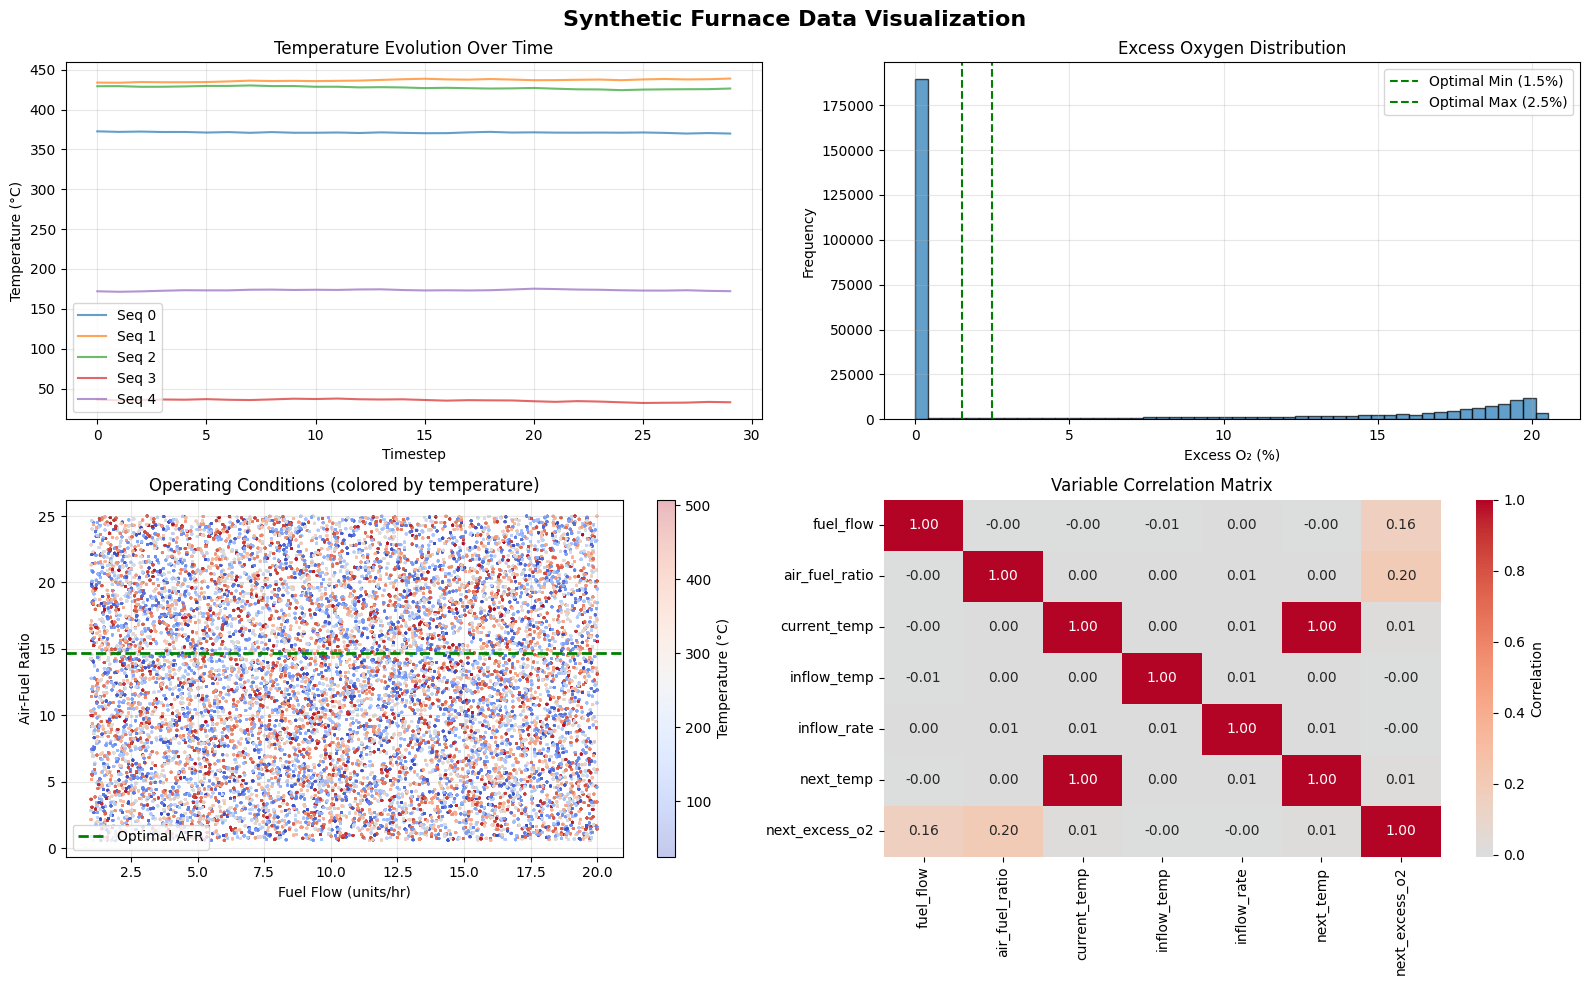


💾 Data saved to 'synthetic_temperature_data.csv'

SAMPLE DATA (First 10 rows)
   sequence  timestep  fuel_flow  air_fuel_ratio  current_temp  inflow_temp  \
0         0         0   8.116262       23.797429    372.697122   159.865848   
1         0         1   8.116262       23.797429    372.009043   163.527610   
2         0         2   8.116262       23.797429    372.425119   168.226708   
3         0         3   8.116262       23.797429    371.849729   165.060753   
4         0         4   8.116262       23.797429    371.899173   162.973045   
5         0         5   8.116262       23.797429    371.178092   161.636663   
6         0         6   8.116262       23.797429    371.748375   161.779008   
7         0         7   8.116262       23.797429    370.841208   158.484249   
8         0         8   8.116262       23.797429    371.738910   161.568222   
9         0         9   8.116262       23.797429    370.934186   160.969747   

   inflow_rate   next_temp  next_excess_o2  
0    7

In [2]:
"""
Furnace Commander - Synthetic Data Generation for Google Colab
Generates synthetic furnace operation data based on thermodynamic principles
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

#==============================================================================
# THERMODYNAMIC CALCULATION FUNCTIONS
#==============================================================================

def calculate_temperature(fuel_flow, air_flow, current_temp, inflow_temp, inflow_rate, noise_level=1.0):
    """
    Calculate next temperature using heat transfer model

    Args:
        fuel_flow: Fuel flow rate (units/hour)
        air_flow: Air flow rate (units/hour)
        current_temp: Current furnace temperature (°C)
        inflow_temp: Incoming material temperature (°C)
        inflow_rate: Material inflow rate (units/hour)
        noise_level: Random noise magnitude (default 1.0)

    Returns:
        float: Next temperature (°C)
    """
    # Convert rates to SI per second (units/hour to units/second)
    fuel_s = fuel_flow / 3600.0
    inflow_s = inflow_rate / 3600.0

    # Physical Constants
    AFR_opt = 14.7                  # Optimal air-fuel ratio
    max_fuel_energy = 39000.0       # kJ per Nm³ (natural gas)
    furnace_mass = 5000.0           # kg
    specific_heat = 0.5             # kJ/(kg·°C)
    heat_loss_coeff = 0.0005        # kJ/(°C·s)
    inlet_coeff = 0.0002            # kJ/(unit·°C·s)
    ambient_temp = 25.0             # °C
    time_step = 1.0                 # second

    # Combustion efficiency (Gaussian curve around optimal AFR)
    AFR = air_flow / max(fuel_flow, 1e-3)
    efficiency = np.exp(-(AFR - AFR_opt)**2 / (2 * 2.0**2))

    # Heat Balance Components
    Q_comb = fuel_s * max_fuel_energy * efficiency * time_step
    Q_loss = heat_loss_coeff * (current_temp - ambient_temp) * time_step
    Q_inflow = inlet_coeff * inflow_s * (current_temp - inflow_temp) * time_step

    # Net energy and temperature change
    net_energy = Q_comb - Q_loss - Q_inflow
    temp_change = net_energy / (furnace_mass * specific_heat)

    # Add random noise
    noise = (np.random.rand() - 0.5) * 2 * noise_level
    new_temp = current_temp + temp_change + noise

    return max(ambient_temp, new_temp)


def calculate_excess_o2(air_fuel_ratio, fuel_flow, current_temp, noise_level=0.2):
    """
    Calculate excess oxygen based on air-fuel ratio and operating conditions

    Args:
        air_fuel_ratio: Air-to-fuel ratio
        fuel_flow: Fuel flow rate (units/hour)
        current_temp: Current furnace temperature (°C)
        noise_level: Random noise magnitude (default 0.2)

    Returns:
        float: Excess oxygen percentage (%)
    """
    # Convert fuel flow to Nm³/s
    fuel_s = fuel_flow / 3600.0

    # Constants
    HHV = 39000.0        # Higher Heating Value (kJ per Nm³)
    U = 0.0005           # Heat transfer coefficient (kJ/(s·m²·°C))
    A = 10.0             # Heat transfer area (m²)
    T_flame = 1800.0     # Flame temperature (°C)
    AFR_opt = 14.7       # Optimal air-fuel ratio
    sigma = 2.0          # Efficiency curve width

    # Combustion efficiency (Gaussian)
    eta = np.exp(-(air_fuel_ratio - AFR_opt)**2 / (2 * sigma**2))

    # Heat rates
    Q_comb = fuel_s * HHV * eta
    Q_trans = U * A * (T_flame - current_temp)

    # Calculate excess O2 based on heat loss
    frac_lost = max(0, 1 - Q_trans / max(Q_comb, 1e-6))
    excess_o2 = frac_lost * 21.0

    # Add small noise
    noise = (np.random.rand() - 0.5) * 2 * noise_level
    return max(0, excess_o2 + noise)


#==============================================================================
# DATA GENERATION FUNCTION
#==============================================================================

def generate_synthetic_data(num_sequences=10000, sequence_length=30):
    """
    Generate synthetic furnace operation data for ML training

    Args:
        num_sequences: Number of operation scenarios to generate
        sequence_length: Number of timesteps per scenario

    Returns:
        pandas.DataFrame: Synthetic data with columns:
            - sequence: Sequence ID
            - timestep: Timestep within sequence
            - fuel_flow: Fuel flow rate (units/hour)
            - air_fuel_ratio: Air-to-fuel ratio
            - current_temp: Current temperature (°C)
            - inflow_temp: Inflow temperature (°C)
            - inflow_rate: Inflow rate (units/hour)
            - next_temp: Next temperature (°C)
            - next_excess_o2: Next excess oxygen (%)
    """

    print(f"Generating {num_sequences} sequences × {sequence_length} timesteps...")
    print(f"Total data points: {num_sequences * sequence_length:,}")

    # Define variable ranges
    ranges = {
        'fuel_flow':      (1.0, 20.0),
        'air_fuel_ratio': (0.6, 25.0),
        'current_temp':   (25.0, 500.0),
        'inflow_temp':    (100.0, 200.0),
        'inflow_rate':    (50.0, 200.0)
    }

    # Generate data
    records = []
    for seq in range(num_sequences):
        # Initialize random starting conditions for this sequence
        fuel_flow = np.random.uniform(*ranges['fuel_flow'])
        afr = np.random.uniform(*ranges['air_fuel_ratio'])
        current_temp = np.random.uniform(*ranges['current_temp'])
        inflow_temp = np.random.uniform(*ranges['inflow_temp'])
        inflow_rate = np.random.uniform(*ranges['inflow_rate'])
        air_flow = fuel_flow * afr

        # Generate timesteps
        for t in range(sequence_length):
            # Calculate next states
            next_temp = calculate_temperature(
                fuel_flow, air_flow, current_temp, inflow_temp, inflow_rate
            )
            next_o2 = calculate_excess_o2(afr, fuel_flow, current_temp)

            # Store record
            records.append({
                'sequence':        seq,
                'timestep':        t,
                'fuel_flow':       fuel_flow,
                'air_fuel_ratio':  afr,
                'current_temp':    current_temp,
                'inflow_temp':     inflow_temp,
                'inflow_rate':     inflow_rate,
                'next_temp':       next_temp,
                'next_excess_o2':  next_o2
            })

            # Update state for next timestep (random walk with bounds)
            current_temp = next_temp
            inflow_temp = np.clip(
                inflow_temp + (np.random.rand() - 0.5) * 10,  # ±5°C variation
                *ranges['inflow_temp']
            )
            inflow_rate = np.clip(
                inflow_rate + (np.random.rand() - 0.5) * 20,  # ±10 units variation
                *ranges['inflow_rate']
            )

        # Progress indicator
        if (seq + 1) % 1000 == 0:
            print(f"  Generated {seq + 1:,} sequences...")

    # Convert to DataFrame
    df = pd.DataFrame(records)
    print(f"\n✅ Generation complete! Shape: {df.shape}")

    return df


#==============================================================================
# DATA ANALYSIS & VISUALIZATION
#==============================================================================

def analyze_data(df):
    """Display statistical summary of generated data"""

    print("\n" + "="*70)
    print("DATA STATISTICS")
    print("="*70)

    variables = ['fuel_flow', 'air_fuel_ratio', 'current_temp',
                 'inflow_temp', 'inflow_rate', 'next_temp', 'next_excess_o2']

    stats = []
    for var in variables:
        stats.append({
            'Variable': var,
            'Mean': df[var].mean(),
            'Std': df[var].std(),
            'Min': df[var].min(),
            'Max': df[var].max(),
            'Range': df[var].max() - df[var].min()
        })

    stats_df = pd.DataFrame(stats)
    print(stats_df.to_string(index=False))

    return stats_df


def visualize_data(df, num_sequences_to_plot=5):
    """Create visualization plots of generated data"""

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Synthetic Furnace Data Visualization', fontsize=16, fontweight='bold')

    # Plot 1: Temperature trajectories
    ax = axes[0, 0]
    for seq in range(num_sequences_to_plot):
        seq_data = df[df['sequence'] == seq]
        ax.plot(seq_data['timestep'], seq_data['current_temp'], alpha=0.7, label=f'Seq {seq}')
    ax.set_xlabel('Timestep')
    ax.set_ylabel('Temperature (°C)')
    ax.set_title('Temperature Evolution Over Time')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Plot 2: Excess O2 distribution
    ax = axes[0, 1]
    ax.hist(df['next_excess_o2'], bins=50, edgecolor='black', alpha=0.7)
    ax.axvline(1.5, color='green', linestyle='--', label='Optimal Min (1.5%)')
    ax.axvline(2.5, color='green', linestyle='--', label='Optimal Max (2.5%)')
    ax.set_xlabel('Excess O₂ (%)')
    ax.set_ylabel('Frequency')
    ax.set_title('Excess Oxygen Distribution')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Plot 3: Fuel Flow vs Air-Fuel Ratio
    ax = axes[1, 0]
    scatter = ax.scatter(df['fuel_flow'], df['air_fuel_ratio'],
                        c=df['next_temp'], cmap='coolwarm', alpha=0.3, s=1)
    ax.axhline(14.7, color='green', linestyle='--', linewidth=2, label='Optimal AFR')
    ax.set_xlabel('Fuel Flow (units/hr)')
    ax.set_ylabel('Air-Fuel Ratio')
    ax.set_title('Operating Conditions (colored by temperature)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax, label='Temperature (°C)')

    # Plot 4: Correlation heatmap
    ax = axes[1, 1]
    correlation = df[['fuel_flow', 'air_fuel_ratio', 'current_temp',
                      'inflow_temp', 'inflow_rate', 'next_temp', 'next_excess_o2']].corr()
    sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, ax=ax, cbar_kws={'label': 'Correlation'})
    ax.set_title('Variable Correlation Matrix')

    plt.tight_layout()
    plt.show()


#==============================================================================
# MAIN EXECUTION (FOR COLAB)
#==============================================================================

# Generate synthetic data
df = generate_synthetic_data(num_sequences=10000, sequence_length=30)

# Analyze data
stats = analyze_data(df)

# Visualize data
visualize_data(df, num_sequences_to_plot=5)

# Save to CSV (optional)
df.to_csv('synthetic_temperature_data.csv', index=False)
print("\n💾 Data saved to 'synthetic_temperature_data.csv'")

# Display sample data
print("\n" + "="*70)
print("SAMPLE DATA (First 10 rows)")
print("="*70)
print(df.head(10))

print("\n✅ Data generation complete!")

## Let's Build the Model

The data is readily generated. Although looks very far from real life condtion, but the data is sound theoretically. Therefore, it is recommended to proceed with model building.

For the model, the Cfc (closed-form-continous) variant of Liquid Neural Network will be chosen. The rationale behind this is to remove the requirement for ODE solver. The Cfc works by approximating the integral part of input $I(t)$ thus effectively reduce the computational load during training.

The CfC will be the internal body of the model. It will be connected with 2 heads. The first is the predictive head for the CfC, which predicts the next temperature and next excess $O_2$ for the system. The other head will be the EBM head. This will be the head used to obtain the multi-objective conditon.

Three objectives are laid down for this pilot study.

1. To meet the optimum excess $O_2$ (1.5-2.5%)
2. To ensure furnace operate at lowest operating cost
3. To ensure furnace operate at safe


The model will be trained together using a joint loss function. This is the core of the hybrid architecture. Instead of a single loss, the total loss $L_{\text{Total}}$ is a composite, weighted sum of the loss from each head:

$$L_{\text{Total}} = L_{\text{LNN}} + \alpha \cdot L_{\text{EBM}}$$

Where:
$L_{\text{LNN}}$ (The Physics Loss): This is the Mean Squared Error from the predictive head. It measures how accurately the model predicts the physical state (next_temp and next_excess_o2).

$L_{\text{EBM}}$ (The Energy Loss): This is the Mean Squared Error from the EBM head. It measures how accurately the model predicts the multi-objective cost (energy_true).

$\alpha$ (The "Scientist's Knob"): This is our critical hyperparameter that balances the two tasks. It "amplifies the voice" of the EBM, forcing the Cfc body to treat the cost-landscape prediction as seriously as the physics prediction.By training on this single $L_{\text{Total}}$, we force the Cfc's internal hidden state to learn a rich representation that is simultaneously aware of both the physical dynamics and our defined multi-objective "energy" landscape.



In [ ]:
#so let's build the code for our multi-objective condition
def CO_model(o2_excess):
    """
    Calculates the CO (ppm) based on the excess O2 level.
    This function is vectorized to handle numpy arrays.
    """
    # Condition 1: O2 < 1.5%
    cond1 = (o2_excess < 1.5)
    val1 = np.minimum(100.0, 6.0 * np.exp(1.6 * (1.5 - o2_excess)))

    # Condition 2: 1.5% <= O2 <= 2.5%
    cond2 = (o2_excess >= 1.5) & (o2_excess <= 2.5)
    val2 = 0.0

    # Condition 3: O2 > 2.5%
    cond3 = (o2_excess > 2.5)
    val3 = 1.0 + (o2_excess - 2.5)

    # Combine conditions
    return np.where(cond1, val1, np.where(cond2, val2, val3))


def calculate_true_energy(fuel_flow, next_excess_o2):
    """
    Calculates the "true" energy (cost) for a given state-action pair.
    This will be the target for our EBM head.
    """

    W_FUEL = 1.0
    W_SAFETY = 100.0 #this is the safety weight that is tunable for the experiment.

    # Objective B: Minimize energy consumption
    cost_fuel = W_FUEL * fuel_flow

    # Objective A & C: Optimize O2 / Maintain Safety
    cost_safety = W_SAFETY * CO_model(next_excess_o2)

    return cost_fuel + cost_safety

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from ncps.torch import CfC
import matplotlib.pyplot as plt
import os
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Set a fixed random seed for reproducibility
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# --- Hyperparameters ---
FILE_PATH = 'synthetic_temperature_data.csv'
HIDDEN_SIZE = 128
SEQUENCE_LENGTH = 30 # From your data spec (30 timesteps per sequence)
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 110
ALPHA = 1.0 # Weight for the EBM energy loss

# --- Physics-based EBM Cost Function (from your spec) ---

# We need a vectorized version of the CO model to apply to pandas/numpy arrays
def CO_model(o2_excess):
    """
    Calculates the CO (ppm) based on the excess O2 level.
    This function is vectorized to handle numpy arrays.
    """
    # Condition 1: O2 < 1.5%
    cond1 = (o2_excess < 1.5)
    val1 = np.minimum(100.0, 6.0 * np.exp(1.6 * (1.5 - o2_excess)))

    # Condition 2: 1.5% <= O2 <= 2.5%
    cond2 = (o2_excess >= 1.5) & (o2_excess <= 2.5)
    val2 = 0.0

    # Condition 3: O2 > 2.5%
    cond3 = (o2_excess > 2.5)
    val3 = 1.0 + (o2_excess - 2.5)

    # Combine conditions
    return np.where(cond1, val1, np.where(cond2, val2, val3))

def calculate_true_energy(fuel_flow, next_excess_o2):
    """
    Calculates the "true" energy (cost) for a given state-action pair.
    This will be the target for our EBM head.
    """
    # EBM Weights (Tunable, but we'll fix them for the pilot)
    W_FUEL = 1.0
    W_SAFETY = 100.0 # Make safety (CO) a high-penalty item

    # Objective B: Minimize energy consumption
    cost_fuel = W_FUEL * fuel_flow

    # Objective A & C: Optimize O2 / Maintain Safety
    cost_safety = W_SAFETY * CO_model(next_excess_o2)

    return cost_fuel + cost_safety

# --- Phase 1: Data Preparation ---

def load_and_prepare_data(file_path, seq_len, batch_size):
    """
    Loads, processes, and prepares the data for the EBLNN.
    """
    print(f"Loading data from {file_path}...")
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        print("Please make sure 'synthetic_temperature_data.csv' is in the same directory.")
        return None, None, None, None, None

    # 1. Compute the "true energy" target for the EBM head
    print("Calculating true energy target (E_true)...")
    df['energy_true'] = calculate_true_energy(df['fuel_flow'], df['next_excess_o2'])

    # 2. Define Input Features and Output Targets
    # Inputs (X): The state and action at time 't'
    input_cols = [
        'fuel_flow', 'air_fuel_ratio', 'current_temp',
        'inflow_temp', 'inflow_rate'
    ]

    # Outputs (Y): The predicted state and energy at time 't+1'
    # We train the model to predict all three jointly
    output_cols = [
        'next_temp', 'next_excess_o2', 'energy_true'
    ]

    INPUT_FEATURES = len(input_cols)
    OUTPUT_FEATURES = len(output_cols) # This is 3

    # 3. Reshape data into sequences (N_sequences, Seq_Len, N_features)
    # Total rows = 300,000. Seq_Len = 30. -> N_sequences = 10,000
    n_sequences = len(df) // seq_len

    x_data = df[input_cols].values.reshape(n_sequences, seq_len, INPUT_FEATURES)
    y_data = df[output_cols].values.reshape(n_sequences, seq_len, OUTPUT_FEATURES)

    # 4. Train/Val/Test Split (80% Train, 10% Val, 10% Test)
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, y_data, test_size=0.2, random_state=SEED
    )
    x_val, x_test, y_val, y_test = train_test_split(
        x_test, y_test, test_size=0.5, random_state=SEED
    )

    print(f"Data split: {len(x_train)} train, {len(x_val)} val, {len(x_test)} test sequences.")

    # 5. Scaling (CRITICAL for LNNs)
    # We must scale inputs and outputs based on the TRAINING set only

    # Reshape to 2D for scaler
    x_train_2d = x_train.reshape(-1, INPUT_FEATURES)
    y_train_2d = y_train.reshape(-1, OUTPUT_FEATURES)

    input_scaler = StandardScaler().fit(x_train_2d)
    target_scaler = StandardScaler().fit(y_train_2d)

    # Apply scaling to all sets
    x_train = input_scaler.transform(x_train_2d).reshape(x_train.shape)
    y_train = target_scaler.transform(y_train_2d).reshape(y_train.shape)

    x_val = input_scaler.transform(x_val.reshape(-1, INPUT_FEATURES)).reshape(x_val.shape)
    y_val = target_scaler.transform(y_val.reshape(-1, OUTPUT_FEATURES)).reshape(y_val.shape)

    x_test = input_scaler.transform(x_test.reshape(-1, INPUT_FEATURES)).reshape(x_test.shape)
    y_test = target_scaler.transform(y_test.reshape(-1, OUTPUT_FEATURES)).reshape(y_test.shape)

    print("Data scaling complete.")

    # 6. Create PyTorch Tensors and DataLoaders
    train_dataset = TensorDataset(torch.FloatTensor(x_train), torch.FloatTensor(y_train))
    val_dataset = TensorDataset(torch.FloatTensor(x_val), torch.FloatTensor(y_val))
    test_dataset = TensorDataset(torch.FloatTensor(x_test), torch.FloatTensor(y_test))

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    print("DataLoaders created.")

    return (train_loader, val_loader, test_loader,
            input_scaler, target_scaler,
            INPUT_FEATURES, OUTPUT_FEATURES)


# --- Phase 2: EBLNN Model Definition ---

class EBLNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size_prediction, output_size_energy):
        super(EBLNN, self).__init__()

        self.hidden_size = hidden_size

        # 1. Body: The Cfc (LNN) core
        # We use 'mixed_memory=True' as it often improves performance
        self.cfc_body = CfC(input_size, hidden_size, mixed_memory=True, batch_first=True)

        # 2. Head 1: The LNN Prediction Head
        # Predicts: [next_temp, next_excess_o2]
        self.predict_head = nn.Linear(hidden_size, output_size_prediction)

        # 3. Head 2: The EBM Energy Head
        # Predicts: [energy_true]
        self.energy_head = nn.Linear(hidden_size, output_size_energy)

    def forward(self, x, hx=None):
        # x shape: (batch_size, seq_len, input_size)

        # Pass input through the Cfc body
        # h_seq shape: (batch_size, seq_len, hidden_size)
        h_seq, last_h = self.cfc_body(x, hx)

        # Pass the *entire sequence* of hidden states to the heads
        # This gives us a prediction for every timestep

        # Prediction Head Output
        # y_pred shape: (batch_size, seq_len, output_size_prediction)
        y_pred = self.predict_head(h_seq)

        # Energy Head Output
        # e_pred shape: (batch_size, seq_len, output_size_energy)
        e_pred = self.energy_head(h_seq)

        return y_pred, e_pred, last_h

# --- Visualization Functions ---

def plot_loss_curves(history, epochs):
    """
    Plots and saves the training and validation loss curves.
    """
    print("Generating loss curves...")
    epoch_range = range(1, epochs + 1)

    plt.figure(figsize=(15, 5))

    # Plot 1: Total Loss
    plt.subplot(1, 3, 1)
    plt.plot(epoch_range, history['train_loss'], label='Training Total Loss')
    plt.plot(epoch_range, history['val_loss'], label='Validation Total Loss')
    plt.title('Total Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot 2: LNN Prediction Loss (Validation)
    plt.subplot(1, 3, 2)
    plt.plot(epoch_range, history['val_lnn_loss'], label='Validation LNN Loss', color='orange')
    plt.title('Prediction (LNN) Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot 3: EBM Energy Loss (Validation)
    plt.subplot(1, 3, 3)
    plt.plot(epoch_range, history['val_ebm_loss'], label='Validation EBM Loss', color='green')
    plt.title('Energy (EBM) Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('loss_curves.png')
    print("Saved 'loss_curves.png'")
    plt.close()

def plot_parity_plots(true_temp, pred_temp, true_o2, pred_o2, true_energy, pred_energy):
    """
    Plots and saves the parity plots (true vs. predicted) for all targets.
    """
    print("Generating parity plots...")

    # To avoid plotting 30,000 points, we'll sample 5,000
    sample_size = min(5000, len(true_temp))
    indices = np.random.choice(len(true_temp), sample_size, replace=False)

    plt.figure(figsize=(18, 5))

    # Plot 1: Temperature
    plt.subplot(1, 3, 1)
    min_temp = min(np.min(true_temp), np.min(pred_temp))
    max_temp = max(np.max(true_temp), np.max(pred_temp))
    plt.scatter(true_temp[indices], pred_temp[indices], alpha=0.3, s=10)
    plt.plot([min_temp, max_temp], [min_temp, max_temp], 'r--', label='y=x')
    plt.title('LNN Head: Temperature (°C)')
    plt.xlabel('True Next Temperature')
    plt.ylabel('Predicted Next Temperature')
    plt.legend()
    plt.grid(True)

    # Plot 2: Excess O₂
    plt.subplot(1, 3, 2)
    min_o2 = min(np.min(true_o2), np.min(pred_o2))
    max_o2 = max(np.max(true_o2), np.max(pred_o2))
    plt.scatter(true_o2[indices], pred_o2[indices], alpha=0.3, s=10)
    plt.plot([min_o2, max_o2], [min_o2, max_o2], 'r--', label='y=x')
    plt.title('LNN Head: Excess O₂ (%)')
    plt.xlabel('True Next O₂')
    plt.ylabel('Predicted Next O₂')
    plt.legend()
    plt.grid(True)

    # Plot 3: Energy (Cost)
    plt.subplot(1, 3, 3)
    min_e = min(np.min(true_energy), np.min(pred_energy))
    max_e = max(np.max(true_energy), np.max(pred_energy))
    plt.scatter(true_energy[indices], pred_energy[indices], alpha=0.3, s=10)
    plt.plot([min_e, max_e], [min_e, max_e], 'r--', label='y=x')
    plt.title('EBM Head: Energy (Cost)')
    plt.xlabel('True Energy')
    plt.ylabel('Predicted Energy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('parity_plots.png')
    print("Saved 'parity_plots.png'")
    plt.close()

def plot_energy_landscape(model, input_scaler, target_scaler, device):
    """
    Plots and saves the learned energy landscape from the EBM head.
    """
    print("Generating learned energy landscape...")
    model.eval()

    # 1. Define a fixed state (from our spec: T_target=450, typical T_in/F_in)
    # Input cols: ['fuel_flow', 'air_fuel_ratio', 'current_temp', 'inflow_temp', 'inflow_rate']
    T_CURR_FIXED = 450.0
    T_IN_FIXED = 150.0
    F_IN_FIXED = 125.0

    # 2. Create a grid of actions
    fuel_flow_range = np.linspace(1.0, 20.0, 50)
    afr_range = np.linspace(10.0, 25.0, 50)
    xx, yy = np.meshgrid(fuel_flow_range, afr_range)

    # 3. Create the input batch
    grid_inputs = np.zeros((xx.ravel().shape[0], 5))
    grid_inputs[:, 0] = xx.ravel()
    grid_inputs[:, 1] = yy.ravel()
    grid_inputs[:, 2] = T_CURR_FIXED
    grid_inputs[:, 3] = T_IN_FIXED
    grid_inputs[:, 4] = F_IN_FIXED

    # 4. Scale the inputs
    grid_scaled = input_scaler.transform(grid_inputs)

    # 5. Reshape for LNN (batch_size, seq_len, features)
    # We treat each grid point as a batch of 1 sequence of length 1
    # Model input shape: (2500, 1, 5)
    grid_tensor = torch.FloatTensor(grid_scaled).unsqueeze(1).to(device)

    # 6. Run the model
    with torch.no_grad():
        # y_pred shape: (2500, 1, 2), e_pred shape: (2500, 1, 1)
        _, e_pred, _ = model(grid_tensor)

    # 7. De-scale the energy prediction
    # We must use the mean/std for the *energy* column (index 2)
    e_pred_cpu = e_pred.squeeze().cpu().numpy()
    energy_mean = target_scaler.mean_[2]
    energy_std = target_scaler.scale_[2]

    e_pred_denorm = (e_pred_cpu * energy_std) + energy_mean

    # Reshape back to 2D grid
    Z = e_pred_denorm.reshape(xx.shape)

    # 8. Plot the heatmap
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, levels=50, cmap='viridis_r') # _r reverses cmap (blue=low)
    plt.colorbar(label='Predicted Energy (Cost)')
    plt.title(f'Learned Energy Landscape (EBM Head)\nFixed State: T_curr={T_CURR_FIXED}°C')
    plt.xlabel('Fuel Flow (units/hr)')
    plt.ylabel('Air-Fuel Ratio')
    plt.savefig('energy_landscape.png')
    print("Saved 'energy_landscape.png'")
    plt.close()

    # Also plot the "true" landscape for comparison
    print("Generating true energy landscape...")
    # We need the O2 prediction for the *true* model
    # For this, we need to run the physics function
    true_o2_grid = []
    for afr in yy.ravel():
        # O₂_excess = O₂_stoich × (1 - 1/AFR) × 100 (for AFR > 1)
        O2_STOICH = 20.9
        if afr > 1.0:
            true_o2_grid.append(O2_STOICH * (1 - 1/afr) * 100)
        else:
            true_o2_grid.append(0.0)

    true_o2_grid = np.array(true_o2_grid)

    # Now calculate true energy
    true_energy_grid = calculate_true_energy(xx.ravel(), true_o2_grid)
    Z_true = true_energy_grid.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z_true, levels=50, cmap='viridis_r')
    plt.colorbar(label='True Energy (Cost)')
    plt.title(f'True Physics Energy Landscape\nFixed State: T_curr={T_CURR_FIXED}°C')
    plt.xlabel('Fuel Flow (units/hr)')
    plt.ylabel('Air-Fuel Ratio')
    plt.savefig('energy_landscape_TRUE.png')
    print("Saved 'energy_landscape_TRUE.png'")
    plt.close()


# --- Phase 3 & 4: Main Training and Evaluation Loop ---

def main():
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # 1. Load Data
    (train_loader, val_loader, test_loader,
     input_scaler, target_scaler,
     INPUT_FEATURES, OUTPUT_FEATURES) = load_and_prepare_data(
         FILE_PATH, SEQUENCE_LENGTH, BATCH_SIZE
     )

    if train_loader is None:
        return # Exit if data loading failed

    # 2. Initialize Model, Loss, and Optimizer
    # Prediction head outputs 2 values: [next_temp, next_excess_o2]
    OUTPUT_SIZE_PREDICTION = 2
    # Energy head outputs 1 value: [energy_true]
    OUTPUT_SIZE_ENERGY = 1

    model = EBLNN(
        INPUT_FEATURES,
        HIDDEN_SIZE,
        OUTPUT_SIZE_PREDICTION,
        OUTPUT_SIZE_ENERGY
    ).to(device)

    # Loss functions for each head
    lnn_criterion = nn.MSELoss()
    ebm_criterion = nn.MSELoss()

    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    print(f"\nStarting training for {EPOCHS} epochs...")

    # History tracking for Plot 1
    history = {
        'train_loss': [], 'val_loss': [],
        'val_lnn_loss': [], 'val_ebm_loss': []
    }

    # 3. Training Loop
    best_val_loss = float('inf')
    for epoch in range(EPOCHS):
        model.train()
        total_train_loss = 0
        total_train_lnn_loss = 0
        total_train_ebm_loss = 0

        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            # Forward pass
            y_pred, e_pred, _ = model(x_batch)

            # Separate the true targets
            # y_true_pred: [next_temp, next_excess_o2]
            y_true_pred = y_batch[:, :, 0:2]
            # y_true_energy: [energy_true]
            y_true_energy = y_batch[:, :, 2].unsqueeze(-1) # Keep last dim

            # Calculate joint loss
            loss_lnn = lnn_criterion(y_pred, y_true_pred)
            loss_ebm = ebm_criterion(e_pred, y_true_energy)
            total_loss = loss_lnn + ALPHA * loss_ebm

            # Backward pass
            optimizer.zero_grad()
            total_loss.backward()
            optimizer.step()

            total_train_loss += total_loss.item()
            total_train_lnn_loss += loss_lnn.item()
            total_train_ebm_loss += loss_ebm.item()

        avg_train_loss = total_train_loss / len(train_loader)
        avg_train_lnn_loss = total_train_lnn_loss / len(train_loader)
        avg_train_ebm_loss = total_train_ebm_loss / len(train_loader)

        # 4. Validation Loop
        model.eval()
        total_val_loss = 0
        total_val_lnn_loss = 0
        total_val_ebm_loss = 0

        with torch.no_grad():
            for x_batch, y_batch in val_loader:
                x_batch, y_batch = x_batch.to(device), y_batch.to(device)

                y_pred, e_pred, _ = model(x_batch)

                y_true_pred = y_batch[:, :, 0:2]
                y_true_energy = y_batch[:, :, 2].unsqueeze(-1)

                loss_lnn = lnn_criterion(y_pred, y_true_pred)
                loss_ebm = ebm_criterion(e_pred, y_true_energy)
                total_loss = loss_lnn + ALPHA * loss_ebm

                total_val_loss += total_loss.item()
                total_val_lnn_loss += loss_lnn.item()
                total_val_ebm_loss += loss_ebm.item()

        avg_val_loss = total_val_loss / len(val_loader)
        avg_val_lnn_loss = total_val_lnn_loss / len(val_loader)
        avg_val_ebm_loss = total_val_ebm_loss / len(val_loader)

        # Store losses in history
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(avg_val_loss)
        history['val_lnn_loss'].append(avg_val_lnn_loss)
        history['val_ebm_loss'].append(avg_val_ebm_loss)

        print(f"Epoch {epoch+1}/{EPOCHS} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} "
              f"(LNN: {avg_val_lnn_loss:.4f}, EBM: {avg_val_ebm_loss:.4f})")

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), 'eblnn_best_model.pth')
            print(f"  -> New best model saved!")

    # 5. Final Evaluation on Test Set
    print("\nTraining complete. Evaluating on test set with best model...")

    # Load the best model
    model.load_state_dict(torch.load('eblnn_best_model.pth'))
    model.eval()

    all_y_true = []
    all_y_pred = []
    all_e_true = []
    all_e_pred = []

    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            y_pred, e_pred, _ = model(x_batch)

            y_true_pred = y_batch[:, :, 0:2]
            y_true_energy = y_batch[:, :, 2].unsqueeze(-1)

            # Store all predictions and true values (on CPU)
            all_y_true.append(y_true_pred.cpu().numpy())
            all_y_pred.append(y_pred.cpu().numpy())
            all_e_true.append(y_true_energy.cpu().numpy())
            all_e_pred.append(e_pred.cpu().numpy())

    # Concatenate all batches and reshape to 2D
    all_y_true = np.concatenate(all_y_true).reshape(-1, OUTPUT_SIZE_PREDICTION)
    all_y_pred = np.concatenate(all_y_pred).reshape(-1, OUTPUT_SIZE_PREDICTION)
    all_e_true = np.concatenate(all_e_true).reshape(-1, OUTPUT_SIZE_ENERGY)
    all_e_pred = np.concatenate(all_e_pred).reshape(-1, OUTPUT_SIZE_ENERGY)

    # 7. De-normalize the results to interpret them
    # We need to reconstruct the full target shape to use the scaler

    # [next_temp, next_excess_o2, energy_true]
    y_true_full = np.hstack([all_y_true, all_e_true])
    y_pred_full = np.hstack([all_y_pred, all_e_pred])

    y_true_denorm = target_scaler.inverse_transform(y_true_full)
    y_pred_denorm = target_scaler.inverse_transform(y_pred_full)

    # Separate the de-normalized columns
    true_temp = y_true_denorm[:, 0]
    pred_temp = y_pred_denorm[:, 0]

    true_o2 = y_true_denorm[:, 1]
    pred_o2 = y_pred_denorm[:, 1]

    true_energy = y_true_denorm[:, 2]
    pred_energy = y_pred_denorm[:, 2]

    # 8. Calculate and Print Final Metrics (RMSE)
    rmse_temp = np.sqrt(np.mean((pred_temp - true_temp)**2))
    rmse_o2 = np.sqrt(np.mean((pred_o2 - true_o2)**2))
    rmse_energy = np.sqrt(np.mean((pred_energy - true_energy)**2))

    # Calculate Normalized RMSE (as a percentage) for Energy
    mean_true_energy = np.mean(true_energy)
    nrmse_energy_percent = 0.0
    if mean_true_energy > 1e-6: # Avoid division by zero
        nrmse_energy_percent = (rmse_energy / mean_true_energy) * 100

    print("\n--- Final Test Set Evaluation ---")
    print(f"Prediction Head (LNN):")
    print(f"  - Next Temperature RMSE: {rmse_temp:.4f} °C")
    print(f"  - Next Excess O₂ RMSE: {rmse_o2:.4f} %")
    print(f"\nEnergy Head (EBM):")
    print(f"  - Energy (Cost) RMSE: {rmse_energy:.4f}")
    print(f"  - Energy (Cost) NRMSE: {nrmse_energy_percent:.2f} % (of mean)")
    print("\n-----------------------------------")
    print("Pilot study complete. Model 'eblnn_best_model.pth' is saved.")

    # 9. Generate all plots
    print("\nGenerating all visualizations...")
    plot_loss_curves(history, EPOCHS)

    plot_parity_plots(true_temp, pred_temp, true_o2, pred_o2,
                      true_energy, pred_energy)

    plot_energy_landscape(model, input_scaler, target_scaler, device)

    print("\nAll visualizations saved. Script finished.")


if __name__ == "__main__":
    main()

Using device: cpu
Loading data from synthetic_temperature_data.csv...
Calculating true energy target (E_true)...
Data split: 8000 train, 1000 val, 1000 test sequences.
Data scaling complete.
DataLoaders created.

Starting training for 110 epochs...
Epoch 1/110 | Train Loss: 0.6536 | Val Loss: 0.3501 (LNN: 0.0784, EBM: 0.2717)
  -> New best model saved!
Epoch 2/110 | Train Loss: 0.3481 | Val Loss: 0.5853 (LNN: 0.1631, EBM: 0.4222)
Epoch 3/110 | Train Loss: 0.3627 | Val Loss: 0.3788 (LNN: 0.0871, EBM: 0.2916)
Epoch 4/110 | Train Loss: 0.2593 | Val Loss: 0.2950 (LNN: 0.0408, EBM: 0.2542)
  -> New best model saved!
Epoch 5/110 | Train Loss: 0.2771 | Val Loss: 0.2649 (LNN: 0.0401, EBM: 0.2247)
  -> New best model saved!
Epoch 6/110 | Train Loss: 0.2335 | Val Loss: 0.1962 (LNN: 0.0299, EBM: 0.1662)
  -> New best model saved!
Epoch 7/110 | Train Loss: 0.3197 | Val Loss: 0.2701 (LNN: 0.0542, EBM: 0.2159)
Epoch 8/110 | Train Loss: 0.3982 | Val Loss: 0.3148 (LNN: 0.0613, EBM: 0.2535)
Epoch 9/110